<a href="https://colab.research.google.com/github/denisbob31/Cours-ACP/blob/main/Cours_ACP_%26_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTER LES DONNEES

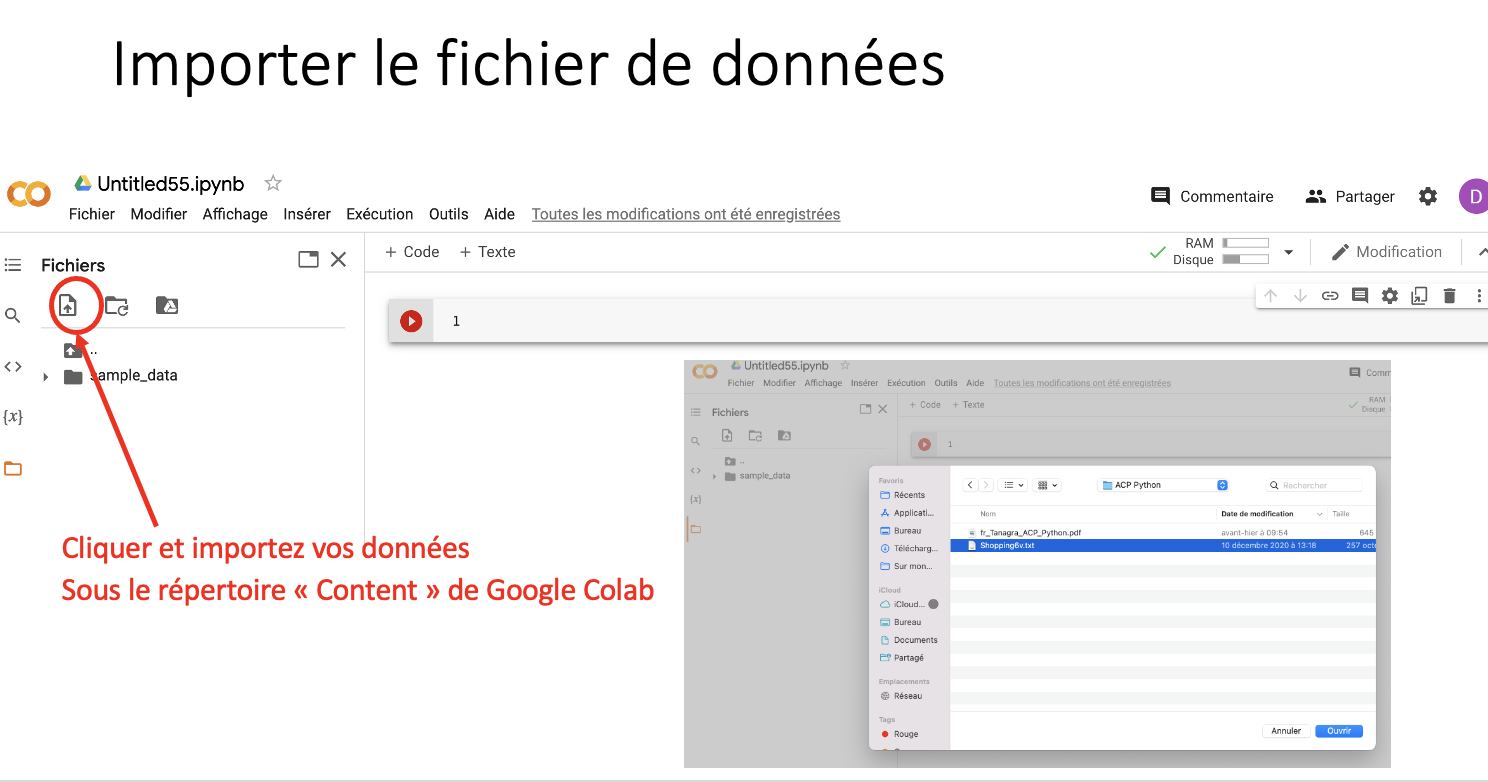

In [1]:
# importer la bibliothèque pandas
import pandas as pd

# importer les données
data_original=pd.read_csv('/content/Shopping6v.txt', sep="\t")
data = data_original
# afficher les statistiques descriptives
data.describe()

,V1,V2,V3,V4,V5,V6
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.850000,4.100000,3.950000,4.100000,3.450000,4.350000
std,1.899446,1.410487,2.012461,1.518309,1.761429,1.496487
min,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
25%,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,3.500000,4.000000
75%,5.250000,5.000000,6.000000,5.250000,4.250000,5.250000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


IMPORTER LES BIBLIOTHEQUES UTILES

In [2]:
import numpy as np
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
#https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.html
import matplotlib.pyplot as plt

PREPARER LES DONNEES

In [3]:
#nombre d'observations
n = data.shape[0]
#nombre de variables
p = data.shape[1]
###############################
# PREPARATION DES DONNEES : centrer réduire
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
zData = sc.fit_transform(data)
print('type de zData :',type(zData))
#print(zData)
print('moyenne : ',zData.mean(), 'ecart-type : ',zData.std())
###############################

type de zData : <class 'numpy.ndarray'>
moyenne :  8.881784197001253e-17 ecart-type :  1.0


In [4]:
#INSTANCIATION
acpData = PCA(svd_solver='full')

#CALCULS
coordData = acpData.fit_transform(zData)
print(coordData)
print(coordData.shape)
#nombre de composantes calculées
# n_components : Nombre de composantes à conserver. Si n_components n'est pas fixé, toutes les composantes sont conservées
# n_components == min(n_samples, n_features)
print('Nombre de composantes : ',acpData.n_components_)


[[ 2.10115014 -0.94782418 -0.51366922  0.34725341 -0.3946536   0.20203308]
 [-1.94011207 -0.6892083   0.53706767 -0.03017942  0.44105131 -0.23437706]
 [ 2.37233676 -1.26144797  1.19830499  0.74787203 -0.02758547 -0.05481027]
 [ 0.16317076  1.81689879 -0.50174711 -0.20641898  0.10495888 -0.04880866]
 [-2.11149147 -1.57749953 -0.35762379 -1.0569824   0.25360738 -0.13920966]
 [ 1.51339332 -0.59499528 -0.39378663 -0.10227804 -0.37641522 -0.41642108]
 [ 1.1993851  -1.01919428  0.15187507 -0.41015566 -0.35728671 -0.02988363]
 [ 2.68369544 -0.48157351  0.69713106  0.25313267 -0.25941519  0.01006684]
 [-1.6285049  -1.19709127 -0.77476325 -0.05244484 -0.40571906 -0.03139141]
 [-0.85781563  1.73028491  0.36086534 -0.13001162 -0.16651818  0.00692003]
 [-1.90425183 -1.51734121 -0.0627974  -0.14401175  0.32770779  0.40248273]
 [ 1.14158404 -0.12206757  0.08261937  0.2823886   0.14769193  0.16326529]
 [-1.70222371 -0.6381033   1.56271185  0.22530673  0.55528497  0.13375473]
 [-0.22870386  2.525621  

Calcul KMO

In [ ]:
pip install factor_analyzer

     |████████████████████████████████| 41 kB 331 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=f5de68f9574bba5c2e3f3513aa074b96e07225017daf5e3b3a4e1b1465c8f477
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
###############################
#CALCUL INDICE KMO EN UTILISANT BIBLIOTHEQUE FACTOR_ANALYSER
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(zData)
print("KMO FACTOR ANALYZER : ",kmo_model)

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
print("Test Sphéricité Bartlett : ",calculate_bartlett_sphericity(zData))

KMO FACTOR ANALYZER :  0.5542495388202117
Test Sphéricité Bartlett :  (66.71181270930695, 1.7090427014176066e-08)


Test KMO : Sortie SPSS

 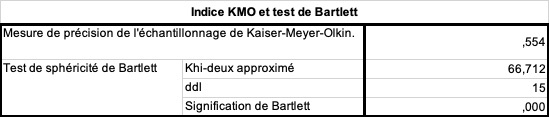

In [ ]:
VARIANCE EXPLIQUEE

eigval : [2.66440817 2.14988965 0.47265531 0.43294927 0.2165031  0.0635945 ]
PROPORTION DE VARIANCE EXPLIQUEE :
[0.44406803 0.35831494 0.07877589 0.07215821 0.03608385 0.01059908]


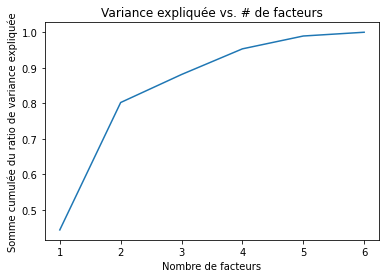

Détermination du nombre de facteur à retenir


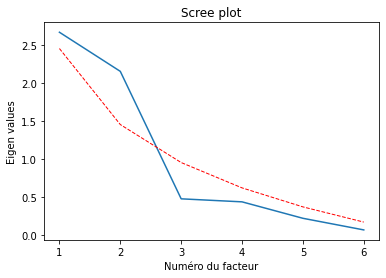

In [ ]:
#variance expliquée
#print('Variance expliquée :', acpData.explained_variance_)
#valeur corrigée
eigval = (n-1)/n*acpData.explained_variance_
print('eigval :', eigval)
#proportion de variance expliquée
print('PROPORTION DE VARIANCE EXPLIQUEE :')
print(acpData.explained_variance_ratio_)

###############################
#cumul de variance expliquée
#############################
#pyplot.plot() trace un graphe avec des valeurs de x et des valeurs de y en reliant les points dans l'ordre de la liste
#numpy.arange() retourne un objet de type numpy.ndarray
#numpy.cumsum() calcule la somme cumulée des éléments du tableau sur un axe donné
plt.plot(np.arange(1,p+1),np.cumsum(acpData.explained_variance_ratio_))
plt.title("Variance expliquée vs. # de facteurs")
plt.ylabel("Somme cumulée du ratio de variance expliquée")
plt.xlabel("Nombre de facteurs")
plt.show()
###############################
#Détermination du nombre de facteur à retenir
print("Détermination du nombre de facteur à retenir")

# TEST DU COUDE
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Numéro du facteur")

#seuils pour test des bâtons brisés
#numpy.flip() inverse l'ordre des éléments du tableau le long de l'axe spécifié, en préservant la forme du tableau
#voir code suivant pour détail
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))
plt.plot(range(1,p+1),b,"r--",linewidth=1)
plt.show()
#print(b)

In [20]:
print((np.arange(6,0,-1)))
print((1/np.arange(6,0,-1)))
print(np.cumsum(1/np.arange(6,0,-1)))
print(np.flip(np.cumsum(1/np.arange(6,0,-1))))

[6 5 4 3 2 1]
[0.16666667 0.2        0.25       0.33333333 0.5        1.        ]
[0.16666667 0.36666667 0.61666667 0.95       1.45       2.45      ]
[2.45       1.45       0.95       0.61666667 0.36666667 0.16666667]


SORTIES SPSS

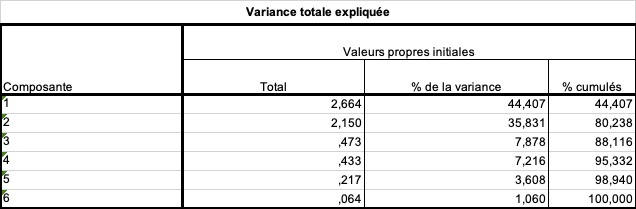

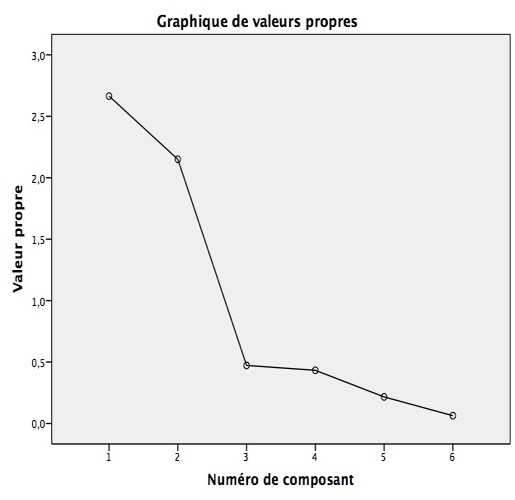

In [ ]:
###############################
#REPRESENTATION DES VARIABLES : aide à l’interprétation
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
  corvar[:,k] = acpData.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print('Corrélation des variables avec les axes')
#print(corvar)

#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':data.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

Corrélation des variables avec les axes
   id     COR_1     COR_2
0  V1  0.960238  0.041971
1  V2 -0.008404  0.823917
2  V3  0.922748 -0.082103
3  V4 -0.223001  0.834179
4  V5 -0.914868 -0.189810
5  V6  0.064054  0.854790


In [28]:
matrice=np.zeros((p,p))
print(matrice)
print(matrice[:,0])
print(acpData.components_[0,:])

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0. 0.]
[ 0.58827245 -0.00514834  0.56530499 -0.13661741 -0.56047752  0.03924183]


SORTIE SPSS

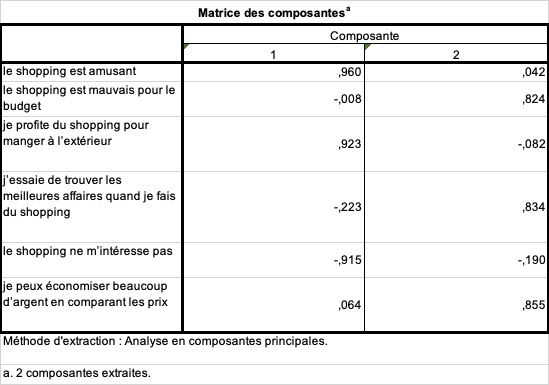

CERCLE DES CORRELATIONS

Cercle des corrélations


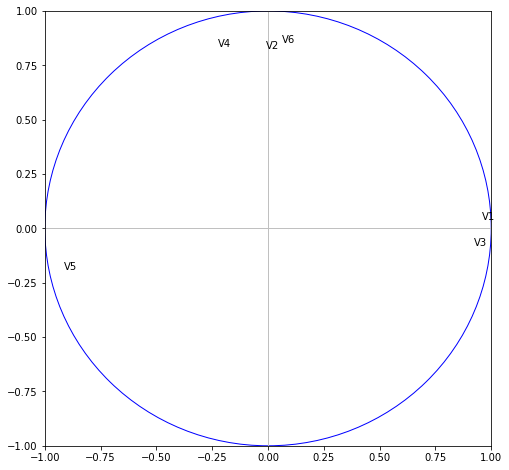

In [ ]:
# DESSIN DU CERCLE DES CORRELATIONS
print('Cercle des corrélations')
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(data.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

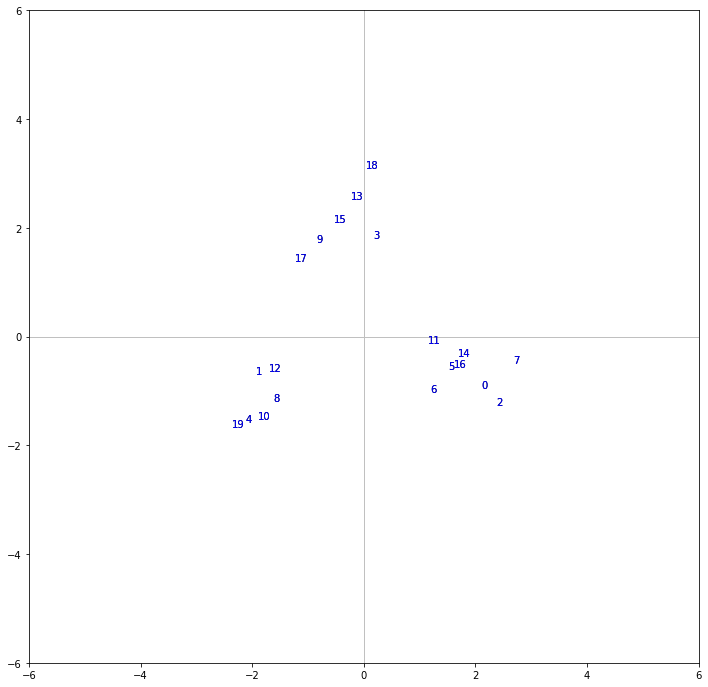

In [47]:
#positionnement des individus supplémentaires dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
#étiquette des points actifs
for i in range(n):
  plt.annotate(data.index[i],(coordData[i,0],coordData[i,1]))

#étiquette des points supplémentaires (illustratifs) en bleu ‘b’
for i in range(coordData.shape[0]):
 plt.annotate(data.index[i],(coordData[i,0],coordData[i,1]),color='b')

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

AUTRES METHODES

CALCUL INDICE KMO

In [ ]:
###############################
#CALCUL INDICE KMO
#matrice des corrélations
R = np.corrcoef(zData,rowvar=False)
#print(R)
#inversion de la matrice
V = np.linalg.inv(R)
#matrice des corrélations partielles
RHO = np.zeros(shape=(p,p))
#double boucle
for l in range(p):
 for j in range(p):
  RHO[l,j] = -V[l,j]/np.sqrt(V[l,l]*V[j,j])
KMO = (np.sum(R**2)-p)/((np.sum(R**2)-p) + (np.sum(RHO**2)-p))
print('KMO : ',KMO)

KMO :  0.5542495388202118


https://ichi.pro/fr/introduction-a-l-analyse-factorielle-en-python-116625965253739

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf

Graphique - croisement deux à deux des variables

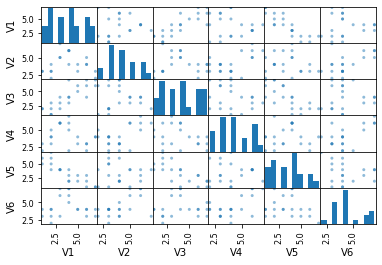

In [43]:
graph=pd.plotting.scatter_matrix(data)

Classification Ascendante hiérarchique

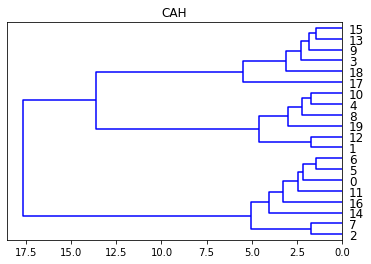

In [52]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#générer la matrice des liens
Z = linkage(data,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=data.index,orientation='left',color_threshold=0)
plt.show()

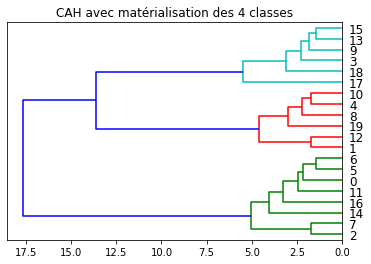

   Individu
1         0
1        16
1         2
1        14
1         5
1         6
1         7
1        11
2        12
2        10
2        19
2         8
2         4
2         1
3        13
3         3
3        15
3        17
3        18
3         9


In [70]:
from scipy.cluster.hierarchy import fcluster
#matérialisation des 3 classes (hauteur t = 7)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=data.index,orientation='left',color_threshold=7)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de 3 groupes obtenus
groupes_cah = fcluster(Z,t=7,criterion='distance')
#print(groupes_cah)
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
AffectationGroupe=pd.DataFrame(data.index[idg],groupes_cah[idg])
AffectationGroupe.columns=['Individu']
print(AffectationGroupe)

In [102]:
#k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data)
#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
AffectationGroupeK=pd.DataFrame(data.index[idk],groupes_cah[idk])
AffectationGroupeK.columns=['Individu']
print(AffectationGroupeK)
#distances aux centres de classes des observations
#print(kmeans.transform(data))

   Individu
3         9
3        17
3        15
3         3
3        13
3        18
2        12
2        10
2        19
2         4
2         1
2         8
1         7
1         6
1        11
1         5
1        14
1         2
1        16
1         0


In [86]:
#correspondance avec les groupes de la CAH
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2
row_0,,,
1,0,0,8
2,0,6,0
3,6,0,0


Projection des individus avec groupes CAH

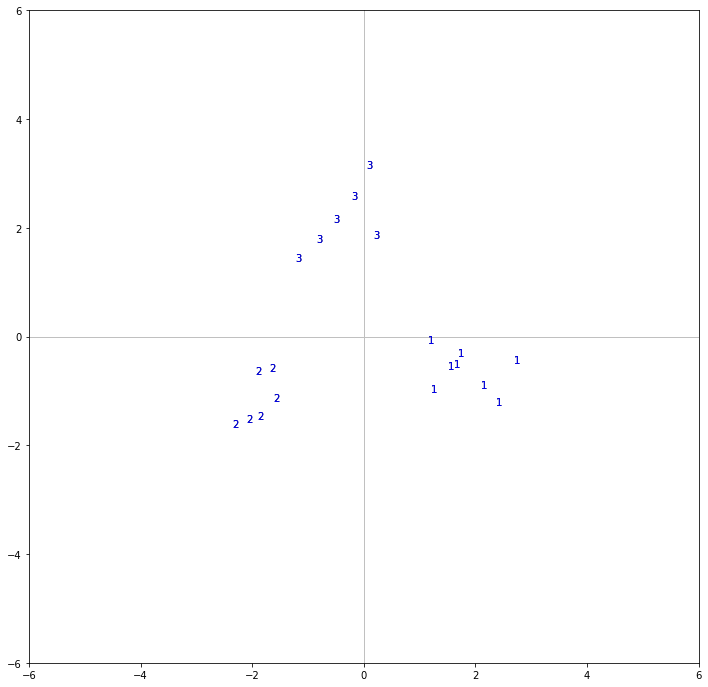

In [99]:
#positionnement des individus supplémentaires dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
#étiquette des points actifs
for i in range(n):
  plt.annotate(groupes_cah[i],(coordData[i,0],coordData[i,1]))

#étiquette des points supplémentaires (illustratifs) en bleu ‘b’
for i in range(coordData.shape[0]):
 plt.annotate(groupes_cah[i],(coordData[i,0],coordData[i,1]),color='b')

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()